<a href="https://colab.research.google.com/github/apoorvavinod46/The-Sparks-Foundation-Internship/blob/main/Task1_Prediction_Using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# THE SPARKS FOUNDATION
# GRIP : FEB-22

### AUTHOR - RIYA MAURYA

### DATA SCIENCE AND BUSINESS ANYLTICS INTERN

### TASK-1 Prediction using Supervised ML

#### Perform exploratory Data Analysis on dataset 'Student' . To Predict the percentage of marks of the students based on the number of hours they studied.

Dataset Sample: http://bit.ly/w-data

In [76]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Reading the Data 
url="http://bit.ly/w-data"
data=pd.read_csv(url)

In [3]:
print(data.shape)
data.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


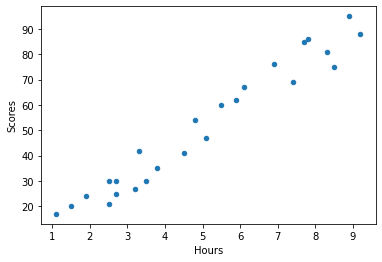

In [6]:
data.plot(kind="scatter", x="Hours", y="Scores");
plt.show()

In [9]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [10]:
data.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [12]:
hours=data["Hours"]
scores=data["Scores"]

<AxesSubplot:xlabel='Hours', ylabel='Density'>

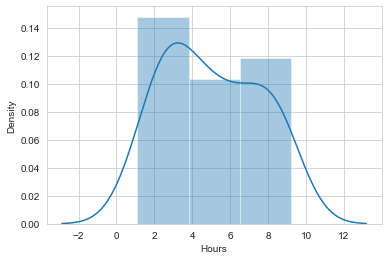

In [79]:
sns.distplot(hours)

<AxesSubplot:xlabel='Scores', ylabel='Density'>

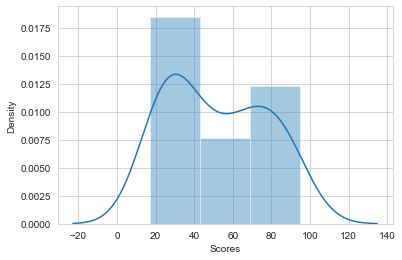

In [78]:
sns.distplot(scores)

### LINEAR REGRESSION

In [35]:
X=data.iloc[:, :-1].values
y=data.iloc[:, 1].values

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

In [37]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

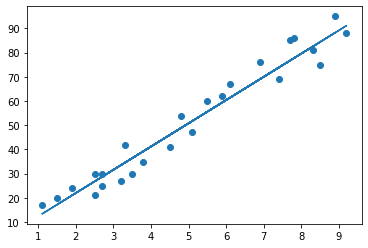

In [38]:
m=reg.coef_
c=reg.intercept_
line=m*X+c
plt.scatter(X,y)
plt.plot(X, line);
plt.show()

In [39]:
y_pred=reg.predict(X_test)

In [40]:
actual_predicted=pd.DataFrame({'Target':y_test,'Predicted':y_pred})
actual_predicted

,Target,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


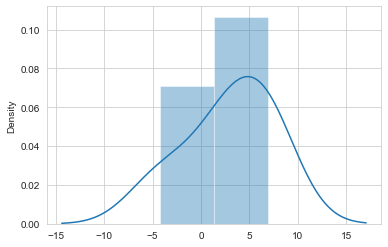

In [80]:
sns.set_style("whitegrid")
sns.distplot(np.array(y_test-y_pred))
plt.show()

#### What would be the predicted score if a student studies for 9.25 hours/day?

In [81]:
h=9.25
s=reg.predict([[h]])
print("If a student studies for {} hours per day he/she will score {} % in exam.".format(h,s))### MODEL EVALUATION

If a student studies for 9.25 hours per day he/she will score [91.56986604] % in exam.


### MODEL EVALUATION

In [85]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test,y_pred))

Mean Absolute Error: 4.5916495300630285
R2 Score: 0.971014141329942
